# Titanic: Machine Learning from Disaster

**unbelivable ... to achieve 1.000. How did they do this?**

**Just curious, how did they cheat the score?** ANS: maybe, we have the information existing in https://www.encyclopedia-titanica.org/titanic-victims/

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Practice Skills
* Binary classification
* Python and R basics

## References
https://www.kaggle.com/c/titanic

https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic


## Data overview
The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary

| **Variable**  | **Definition**  |**Key**  |
|----|----|----|
| eq | qe | qe | 
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
| sex | Sex |  | 	
| Age | Age in years |  |	
| sibsp | # of siblings / spouses aboard the Titanic |  | 	
| parch | # of parents / children aboard the Titanic |  |	
| ticket | Ticket number |  | 	
| fare | Passenger fare |  | 	
| cabin | Cabin number |  | 	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
| Variable | Notes |  |

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data Exploration



### Step 1. Variable Identification
* Identify Preditor (input) variables + Target (output) variables
* Identify the data type and category of variables


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random

In [2]:
trn_corpus = pd.read_csv("data/train.csv")

trn_corpus.info()
trn_corpus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tst_corpus = pd.read_csv("data/test.csv")
tst_corpus.info()
tst_corpus.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


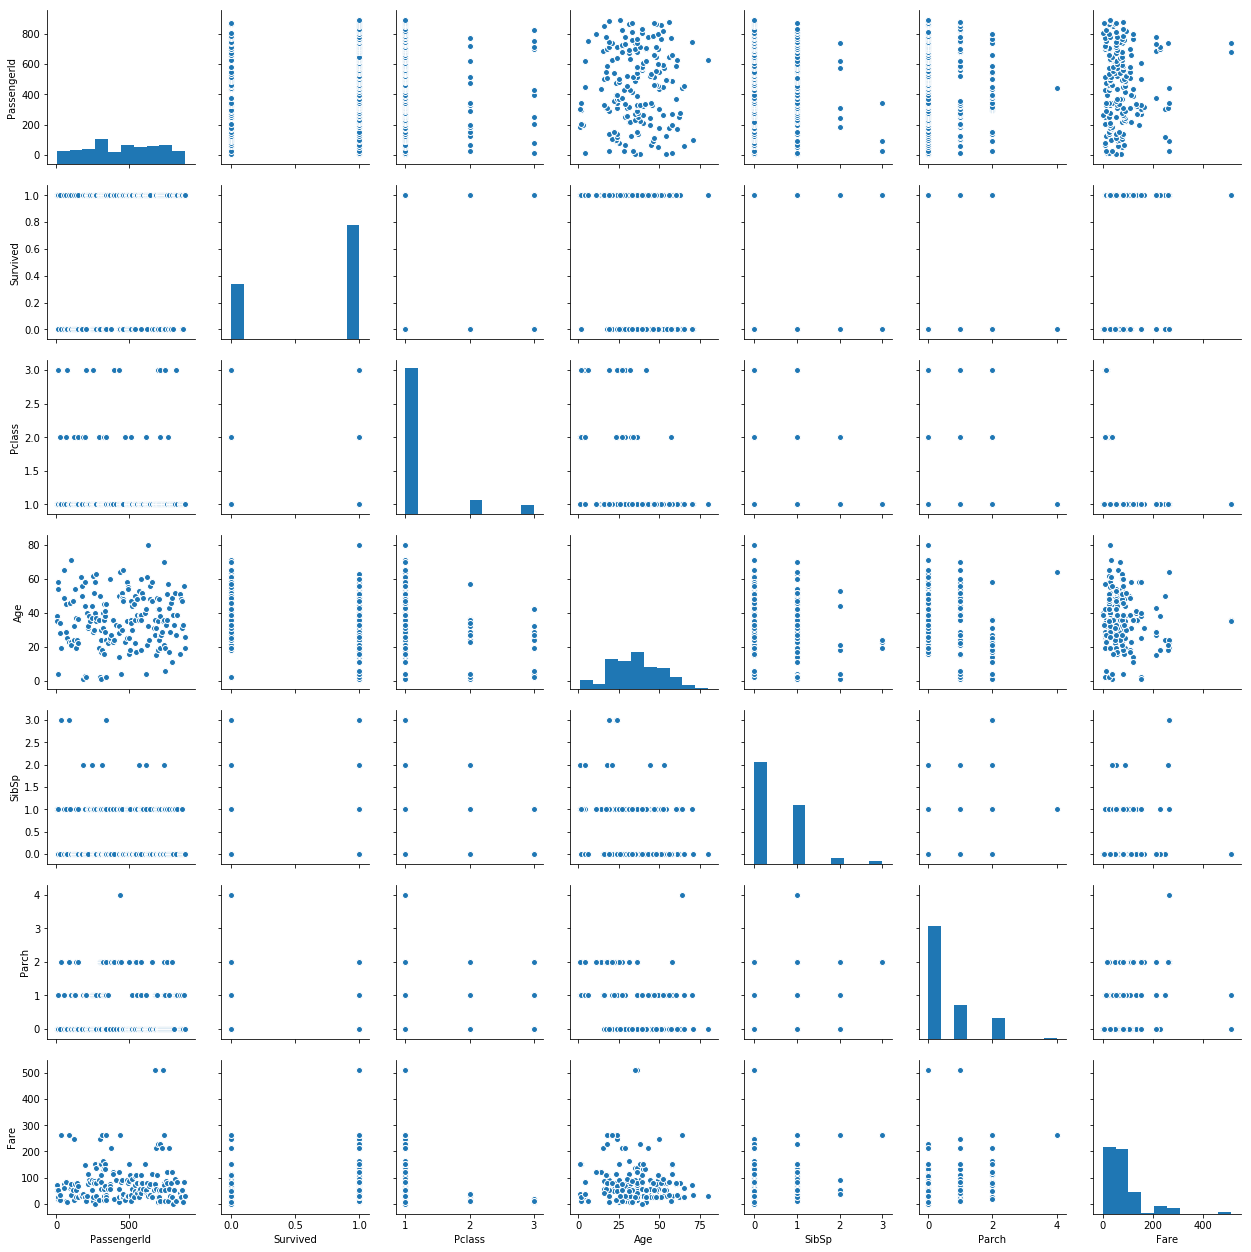

In [10]:
sns.pairplot(trn_corpus.dropna())

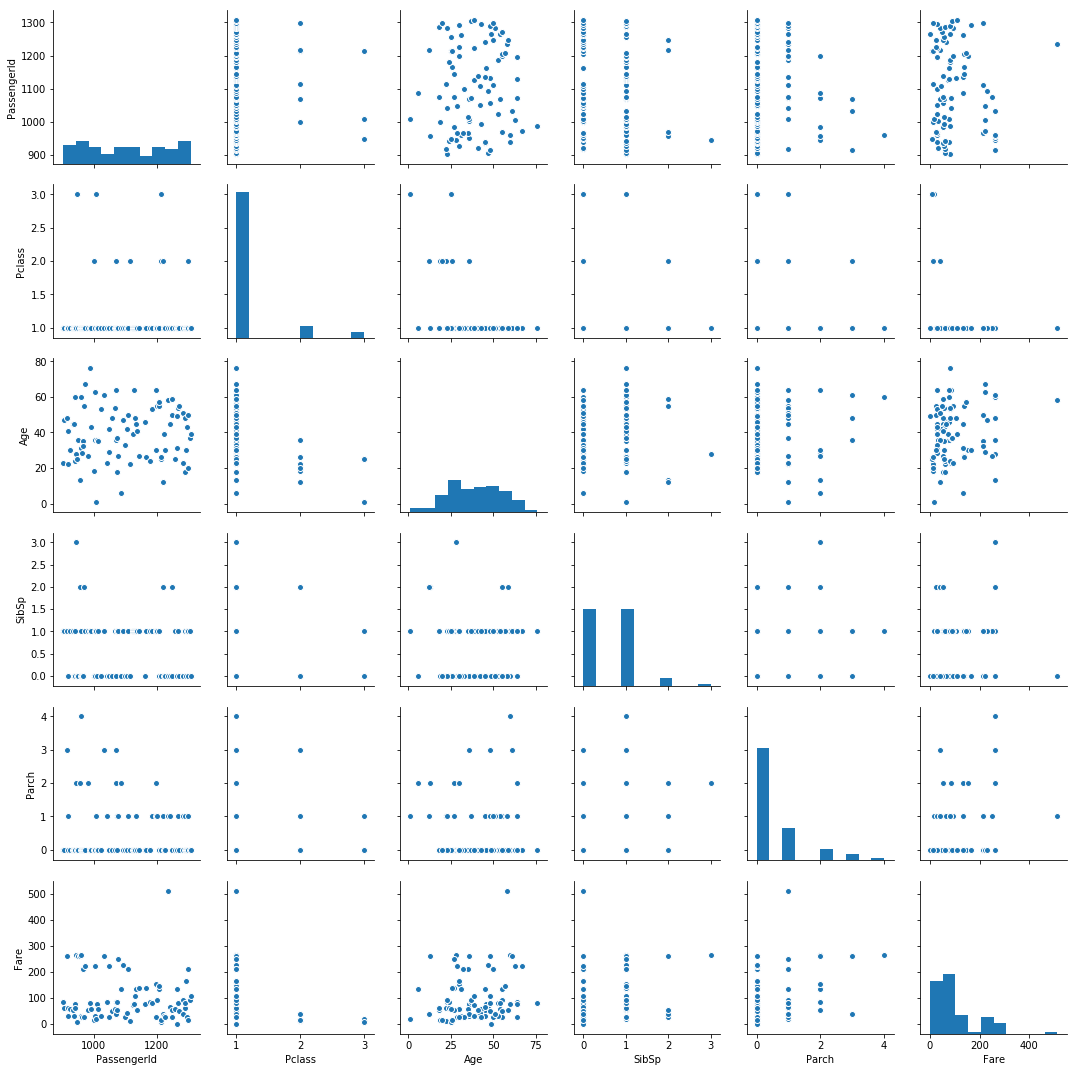

In [11]:
sns.pairplot(tst_corpus.dropna())

### Answer for Step 1:

**1. Preditor (input) Variables and Data type**
* PassengerId    891 non-null int64
* Pclass         891 non-null int64
* Name           891 non-null object
* Sex            891 non-null object
* Age            **714** non-null float64
* SibSp          891 non-null int64
* Parch          891 non-null int64
* Ticket         891 non-null object
* Fare           891 non-null float64
* Cabin          **204** non-null object
* Embarked       **889** non-null object

**2. Target (output) Variables and Data Type**
* Survived       891 non-null int64

**3. Category of Variables**
* Continuous variables
    * PassengerId    891 non-null int64
    * Survived       891 non-null int64
    * Pclass         891 non-null int64
    * Age            **714** non-null float64
    * SibSp          891 non-null int64
    * Parch          891 non-null int64
    * Fare           891 non-null float64
* Categorial variables
    * Name           891 non-null object
    * Sex            891 non-null object
    * Ticket         891 non-null object
    * Cabin          **204** non-null object
    * Embarked       **889** non-null object